#Environment SetUp

##Libraries
###**NLP Libraries**
1. language-tool-python
2. spacy
3. textstat

###**data visualization:**
1. matplotlib
2. seaborn

###**specific models downloaded: **
1. spacy en_core_web_sm
2. nlp = spacy.load("en_core_web_sm")






##imports
**- to enables functionalities**

1. language_tool_python
2. spacy
3. textstat
4. counter from collections module - to count occurences

In [47]:
!pip install language-tool-python spacy textstat
!python -m spacy download en_core_web_sm  # download spaCy’s English model
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import language_tool_python
import spacy
import textstat
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#Text Analaysis logic

## **1. Language Tool Setup**

This will check the spelling and grammar

In [2]:
def analyze_grammar(text):
    tool = language_tool_python.LanguageTool('en-US')
    matches = tool.check(text)

    errors = []
    for match in matches:
        errors.append({
            "error": match.ruleIssueType,
            "message": match.message,
            "suggestions": match.replacements,
            "start_pos": match.offset,
            "end_pos": match.offset + match.errorLength
        })
    return errors


In [3]:
def perform_spelling_analysis(text):
    tool = language_tool_python.LanguageTool('en-US')
    matches = tool.check(text)

    spelling_errors = {}
    for match in matches:
        for replacement in match.replacements:
            if replacement not in spelling_errors:
                spelling_errors[replacement] = 0
            spelling_errors[replacement] += 1

    return spelling_errors

In [4]:
def comprehensive_analysis(text):
    grammar_analysis = analyze_grammar(text)
    syntax_analysis = analyze_syntax(text)
    readability_analysis = analyze_readability(text)
    spelling_analysis = perform_spelling_analysis(text)  # Add this line

    return {
        "grammar_analysis": grammar_analysis,
        "syntax_analysis": syntax_analysis,
        "readability_analysis": readability_analysis,
        "spelling_analysis": spelling_analysis  # Include spelling analysis
    }


## 2.spaCy Setup for NLP analyisis

This will check
1. syntax_analysis
2. extract entities (Named Entity Recognition (NER))
3. part-of-speech tagging (POS)
4. syntactic dependencies (Dependency Parsing)


In [10]:
nlp = spacy.load("en_core_web_sm")

def analyze_syntax(text):
    doc = nlp(text)

    entities = [(ent.text, ent.label_) for ent in doc.ents]
    pos_tags = [(token.text, token.pos_) for token in doc]
    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]

    analysis = {
        "entities": entities,
        "pos_tags": pos_tags,
        "dependencies": dependencies
    }
    return analysis


## 3.textstat Setup

This will check
1. readability_analysis
2. Sentence Length Analysis
3. Word Complexity Analysis

In [11]:
def analyze_readability(text):
    readability = {
        "flesch_reading_ease": textstat.flesch_reading_ease(text),
        "flesch_kincaid_grade": textstat.flesch_kincaid_grade(text),
        "gunning_fog": textstat.gunning_fog(text),
        "sentence_length": textstat.avg_sentence_length(text),
        "syllable_count": textstat.syllable_count(text),
        "word_count": textstat.lexicon_count(text)
    }
    return readability


In [12]:
def comprehensive_analysis(text):
    grammar_analysis = analyze_grammar(text)
    syntax_analysis = analyze_syntax(text)
    readability_analysis = analyze_readability(text)

    return {
        "grammar_analysis": grammar_analysis,
        "syntax_analysis": syntax_analysis,
        "readability_analysis": readability_analysis
    }


#Input Data

##1. Text input

In [24]:
sample_text = "The quick brown fox jumps over the lazy dog. This sentence is easy to understand but can have some stylistic weaknesses."

result = comprehensive_analysis(sample_text)
print(result)


{'grammar_analysis': [], 'syntax_analysis': {'entities': [], 'pos_tags': [('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN'), ('.', 'PUNCT'), ('This', 'DET'), ('sentence', 'NOUN'), ('is', 'AUX'), ('easy', 'ADJ'), ('to', 'PART'), ('understand', 'VERB'), ('but', 'CCONJ'), ('can', 'AUX'), ('have', 'VERB'), ('some', 'DET'), ('stylistic', 'ADJ'), ('weaknesses', 'NOUN'), ('.', 'PUNCT')], 'dependencies': [('The', 'det', 'fox'), ('quick', 'amod', 'fox'), ('brown', 'amod', 'fox'), ('fox', 'nsubj', 'jumps'), ('jumps', 'ROOT', 'jumps'), ('over', 'prep', 'jumps'), ('the', 'det', 'dog'), ('lazy', 'amod', 'dog'), ('dog', 'pobj', 'over'), ('.', 'punct', 'jumps'), ('This', 'det', 'sentence'), ('sentence', 'nsubj', 'is'), ('is', 'ROOT', 'is'), ('easy', 'acomp', 'is'), ('to', 'aux', 'understand'), ('understand', 'xcomp', 'easy'), ('but', 'cc', 'is'), ('can', 'aux', 'have'), ('have', 'conj', 'is'), ('so

##2. File input

In [13]:
from google.colab import files

file_path = 'sampleText.txt'

#Read the file's content
with open(file_path, 'r') as file:
    text = file.read()

# Pass the text content to the comprehensive analysis
result = comprehensive_analysis(text)
print(result)

{'grammar_analysis': [{'error': 'typographical', 'message': 'This sentence does not start with an uppercase letter.', 'suggestions': ['The'], 'start_pos': 0, 'end_pos': 3}, {'error': 'misspelling', 'message': 'Possible spelling mistake found.', 'suggestions': ["don't"], 'start_pos': 20, 'end_pos': 24}, {'error': 'grammar', 'message': 'The pronoun ‘She’ is usually used with a third-person or a past tense verb.', 'suggestions': ['goes', 'went'], 'start_pos': 53, 'end_pos': 55}, {'error': 'grammar', 'message': 'Did you mean “it’s” (contraction of “it is/has”)?', 'suggestions': ["It's"], 'start_pos': 86, 'end_pos': 89}, {'error': 'grammar', 'message': 'The pronoun ‘He’ is usually used with a third-person or a past tense verb.', 'suggestions': ['has', 'had'], 'start_pos': 137, 'end_pos': 141}, {'error': 'grammar', 'message': 'Possible agreement error. The noun ‘reason’ seems to be countable; consider using: “many reasons”.', 'suggestions': ['many reasons'], 'start_pos': 193, 'end_pos': 204}

#Results of analysis

##1. Language Tool Results

In [14]:
# Visualization for Spelling Analysis
def visualize_spelling_analysis(spelling_analysis):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(spelling_analysis.keys()), y=list(spelling_analysis.values()))
    plt.title('Spelling Mistakes Analysis')
    plt.xlabel('Mistakes')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example spelling_analysis data structure (for testing)
# spelling_analysis = {'mistake1': 3, 'mistake2': 5, 'mistake3': 2}
# visualize_spelling_analysis(spelling_analysis)



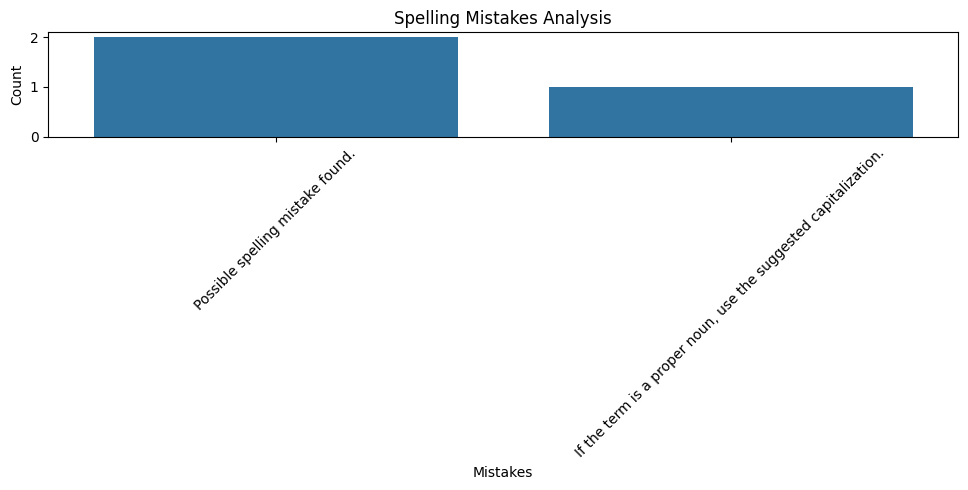

In [15]:
def perform_spelling_analysis(grammar_analysis):
    # Count the occurrences of each spelling mistake
    spelling_errors = [error['message'] for error in grammar_analysis if error['error'] == 'misspelling']
    spelling_counts = Counter(spelling_errors)

    # Visualize the spelling analysis
    visualize_spelling_analysis(spelling_counts)

# Perform spelling analysis
perform_spelling_analysis(result['grammar_analysis'])


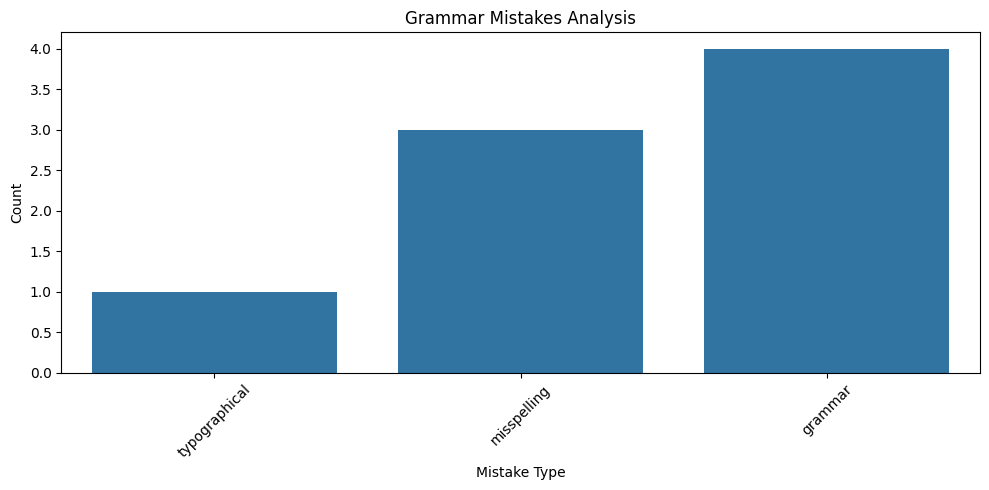

In [16]:
def visualize_grammar_analysis(grammar_analysis):
    error_types = [error['error'] for error in grammar_analysis]
    error_counts = Counter(error_types)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(error_counts.keys()), y=list(error_counts.values()))
    plt.title('Grammar Mistakes Analysis')
    plt.xlabel('Mistake Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize grammar analysis
visualize_grammar_analysis(result['grammar_analysis'])


<ipython-input-17-918029031679>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(errors), palette='viridis')


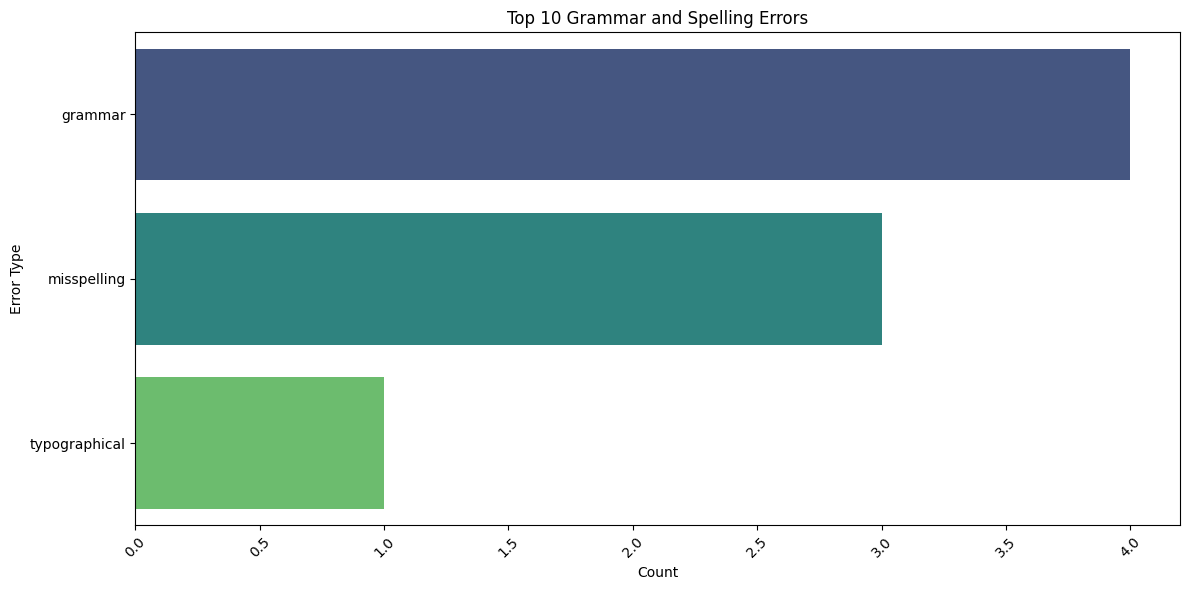

In [17]:
def visualize_top_errors(grammar_analysis):
    # Count occurrences of each error type
    error_types = [error['error'] for error in grammar_analysis]
    error_counts = Counter(error_types)

    # Get the top 10 errors
    top_errors = error_counts.most_common(10)
    if top_errors:
        errors, counts = zip(*top_errors)

        # Create a bar plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(counts), y=list(errors), palette='viridis')
        plt.title('Top 10 Grammar and Spelling Errors')
        plt.xlabel('Count')
        plt.ylabel('Error Type')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No grammar or spelling errors detected.")

# Visualize the top errors after performing comprehensive analysis
result = comprehensive_analysis(text)
visualize_top_errors(result['grammar_analysis'])


<ipython-input-18-c84339f71c25>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(errors), palette='viridis')


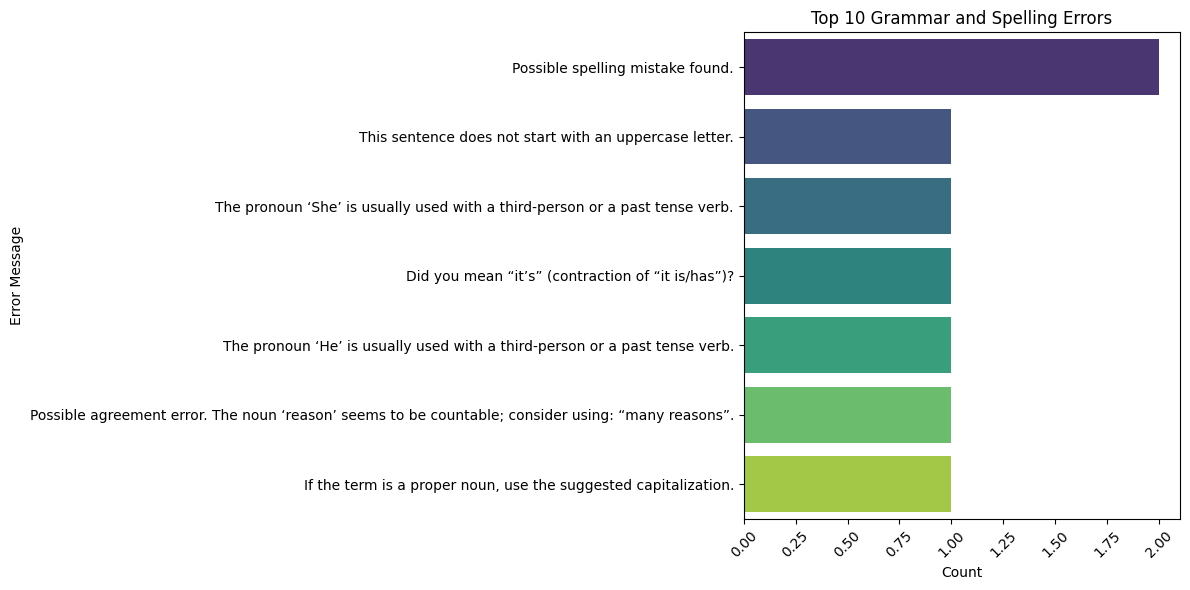

In [18]:
def visualize_top_errors(grammar_analysis):
    # Count occurrences of each error type
    error_types = [error['message'] for error in grammar_analysis]
    error_counts = Counter(error_types)

    # Get the top 10 errors
    top_errors = error_counts.most_common(10)
    if top_errors:
        errors, counts = zip(*top_errors)

        # Create a bar plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(counts), y=list(errors), palette='viridis')
        plt.title('Top 10 Grammar and Spelling Errors')
        plt.xlabel('Count')
        plt.ylabel('Error Message')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No grammar or spelling errors detected.")

# Visualize the top errors after performing comprehensive analysis
result = comprehensive_analysis(text)
visualize_top_errors(result['grammar_analysis'])


In [32]:
def detailed_grammar_errors(grammar_analysis, text):
    errors_details = []
    sentences = text.split('. ')  # Split the text into sentences

    # Find the sentence index based on start position
    for match in grammar_analysis:
        errored_word = text[match['start_pos']:match['end_pos']]

        # Find which sentence the error belongs to based on start position
        sentence_number = next(
            (i + 1 for i, sentence in enumerate(sentences) if match['start_pos'] < sum(len(s) + 2 for s in sentences[:i + 1])),
            None
        )

        errors_details.append({
            "sentence_number": sentence_number,
            "errored_word": errored_word,
            "error_type": match['error'],
            "message": match['message']
        })

    return errors_details

# Get detailed grammar errors
detailed_errors = detailed_grammar_errors(result['grammar_analysis'], text)

# Save detailed errors to a text file
output_file_path = 'grammar_errors_output.txt'
with open(output_file_path, 'w') as file:
    for error in detailed_errors:
        file.write(f"Sentence {error['sentence_number']}: '{error['errored_word']}' - {error['error_type']}: {error['message']}\n")

print(f"Detailed grammar errors have been saved to '{output_file_path}'")


Detailed grammar errors have been saved to 'grammar_errors_output.txt'


In [21]:
def detailed_spelling_errors(grammar_analysis, text):
    errors_details = []
    sentences = text.split('. ')  # Split the text into sentences

    # Find the sentence index based on start position
    for match in grammar_analysis:
        if match['error'] == 'misspelling':  # Check if the error is a spelling mistake
            errored_word = text[match['start_pos']:match['end_pos']]

            # Find which sentence the error belongs to based on start position
            sentence_number = next(
                (i + 1 for i, sentence in enumerate(sentences) if match['start_pos'] < sum(len(s) + 2 for s in sentences[:i + 1])),
                None
            )

            # Get suggestions if available, default to 'None' if not
            suggestions = match.get('replacements', [])
            errors_details.append({
                "sentence_number": sentence_number,
                "errored_word": errored_word,
                "message": match['message'],
                "suggestions": suggestions  # Use get to avoid KeyError
            })

    return errors_details

# Get detailed spelling errors
spelling_errors = detailed_spelling_errors(result['grammar_analysis'], text)

# Save detailed spelling errors to a text file
spelling_output_file_path = 'spelling_errors_output.txt'
with open(spelling_output_file_path, 'w') as file:
    for error in spelling_errors:
        suggestions = ', '.join(error['suggestions']) if error['suggestions'] else 'None'
        file.write(f"Sentence {error['sentence_number']}: '{error['errored_word']}' - {error['message']} (Suggestions: {suggestions})\n")

print(f"Detailed spelling errors have been saved to '{spelling_output_file_path}'")


Detailed spelling errors have been saved to 'spelling_errors_output.txt'


##2. spacy Results

**1. Named Entity Recognition (NER)**

Detected Entities: [('Barack Obama', 'PERSON'), ('Hawaii', 'GPE'), ('44th', 'ORDINAL'), ('the United States', 'GPE')]


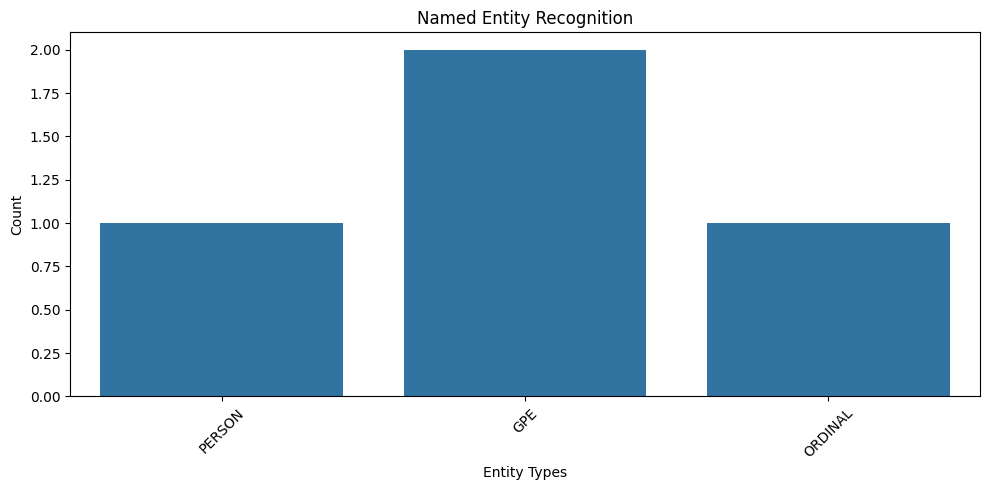

In [22]:
def analyze_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Check if any entities are detected
    print("Detected Entities:", entities)

    # Count entity types
    entity_counts = Counter([ent.label_ for ent in doc.ents])

    if not entity_counts:
        print("No entities found!")
        return entities  # Early exit if no entities

    # Visualizing NER results
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()))
    plt.title('Named Entity Recognition')
    plt.xlabel('Entity Types')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Save NER results to a text file
    with open('ner_output.txt', 'w') as file:
        for entity, label in entities:
            file.write(f'{entity}: {label}\n')

    return entities

# Call the NER analysis function
ner_results = analyze_ner(text)


**2 Part-of-Speech Tagging**

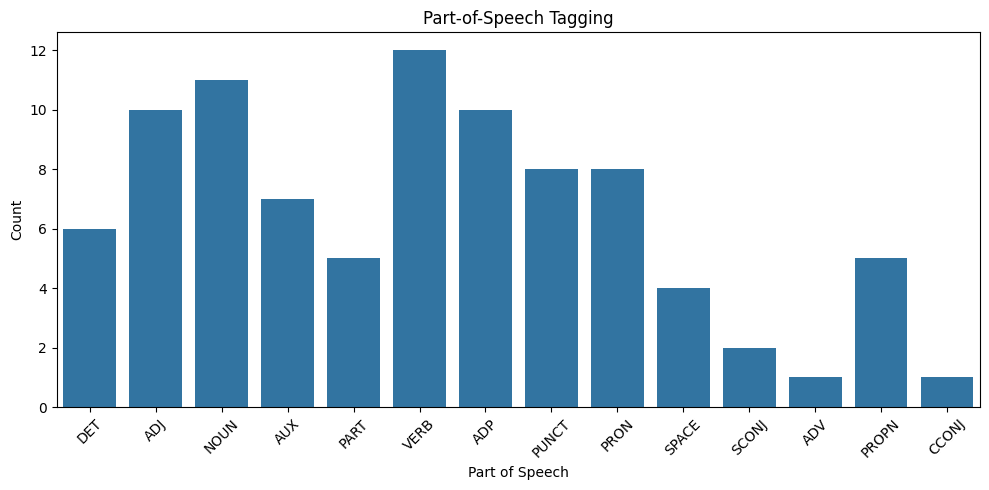

In [23]:
def analyze_pos(text):
    doc = nlp(text)

    pos_tags = [(token.text, token.pos_) for token in doc]

    # Count POS tags
    pos_counts = Counter([pos for _, pos in pos_tags])

    # Visualizing POS results
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
    plt.title('Part-of-Speech Tagging')
    plt.xlabel('Part of Speech')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Save POS results to a text file
    with open('pos_output.txt', 'w') as file:
        for word, pos in pos_tags:
            file.write(f'{word}: {pos}\n')

    return pos_tags

# Call the POS analysis function
pos_results = analyze_pos(text)


**3. Dependency Parsing**

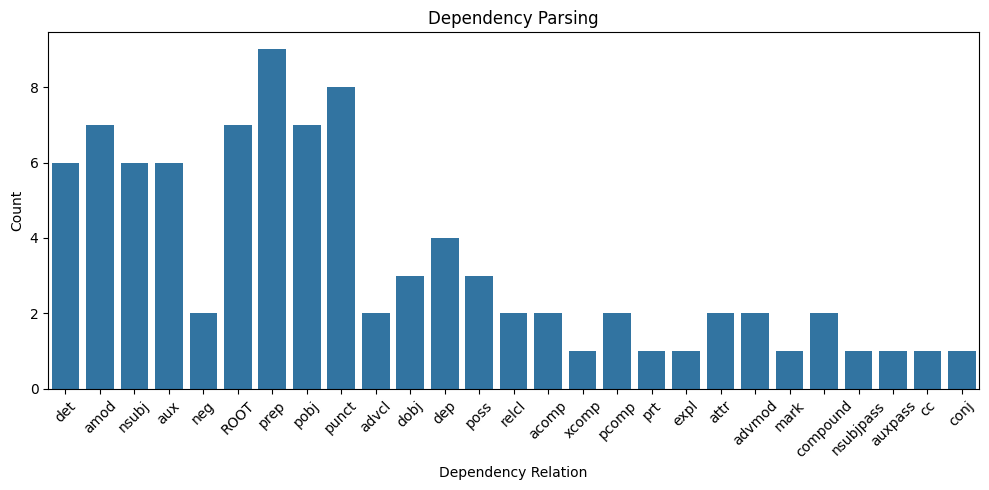

In [24]:
def analyze_dependencies(text):
    doc = nlp(text)

    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]

    # Visualizing dependencies
    plt.figure(figsize=(10, 5))
    sns.countplot(x=[dep[1] for dep in dependencies])
    plt.title('Dependency Parsing')
    plt.xlabel('Dependency Relation')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Save Dependency results to a text file
    with open('dependencies_output.txt', 'w') as file:
        for word, dep, head in dependencies:
            file.write(f'{word} -> {dep} (head: {head})\n')

    return dependencies

# Call the Dependency analysis function
dependency_results = analyze_dependencies(text)


##3. textstat Results

**1. Readability Scores**

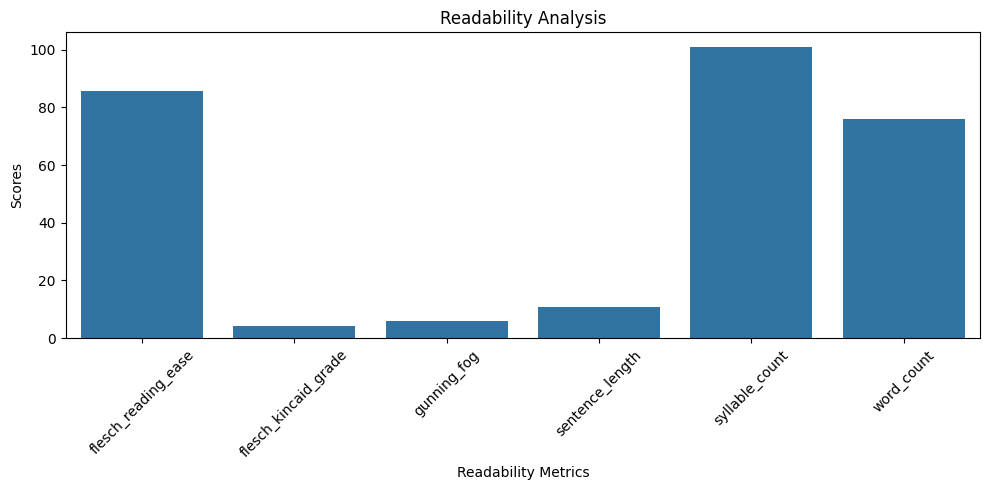

In [30]:
def visualize_readability_analysis(readability_analysis):
    readability_scores = list(readability_analysis.values())
    readability_labels = list(readability_analysis.keys())

    plt.figure(figsize=(10, 5))
    sns.barplot(x=readability_labels, y=readability_scores)
    plt.title('Readability Analysis')
    plt.xlabel('Readability Metrics')
    plt.ylabel('Scores')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize readability analysis
visualize_readability_analysis(result['readability_analysis'])

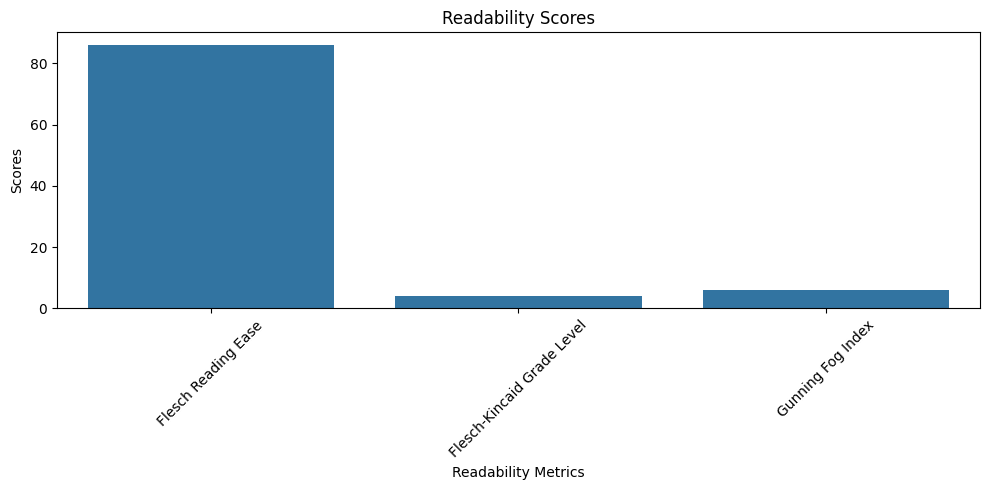

In [31]:
def analyze_readability(text):
    readability_scores = {
        "Flesch Reading Ease": textstat.flesch_reading_ease(text),
        "Flesch-Kincaid Grade Level": textstat.flesch_kincaid_grade(text),
        "Gunning Fog Index": textstat.gunning_fog(text),
    }

    # Visualizing Readability Scores
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(readability_scores.keys()), y=list(readability_scores.values()))
    plt.title('Readability Scores')
    plt.xlabel('Readability Metrics')
    plt.ylabel('Scores')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Save Readability Scores to a text file
    with open('readability_output.txt', 'w') as file:
        for metric, score in readability_scores.items():
            file.write(f'{metric}: {score}\n')

    return readability_scores

# Call the Readability analysis function
readability_results = analyze_readability(text)


**2. Sentence Length Analysis**

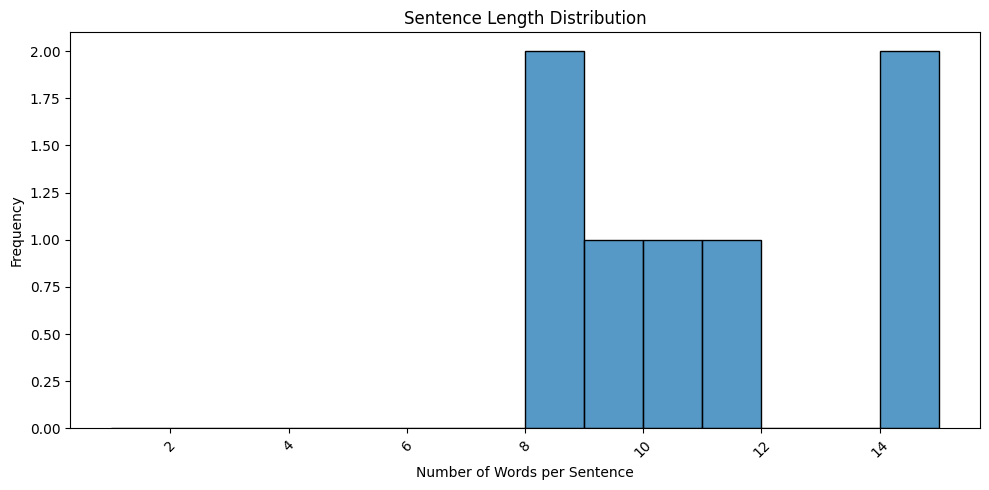

In [26]:
def analyze_sentence_length(text):
    sentences = text.split('.')
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence]

    # Visualizing Sentence Lengths
    plt.figure(figsize=(10, 5))
    sns.histplot(sentence_lengths, bins=range(1, max(sentence_lengths)+1), kde=False)
    plt.title('Sentence Length Distribution')
    plt.xlabel('Number of Words per Sentence')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Save Sentence Length Analysis to a text file
    with open('sentence_length_output.txt', 'w') as file:
        for length in sentence_lengths:
            file.write(f'Sentence length: {length} words\n')

    return sentence_lengths

# Call the Sentence Length analysis function
sentence_length_results = analyze_sentence_length(text)


**3. Word Complexity Analysis**

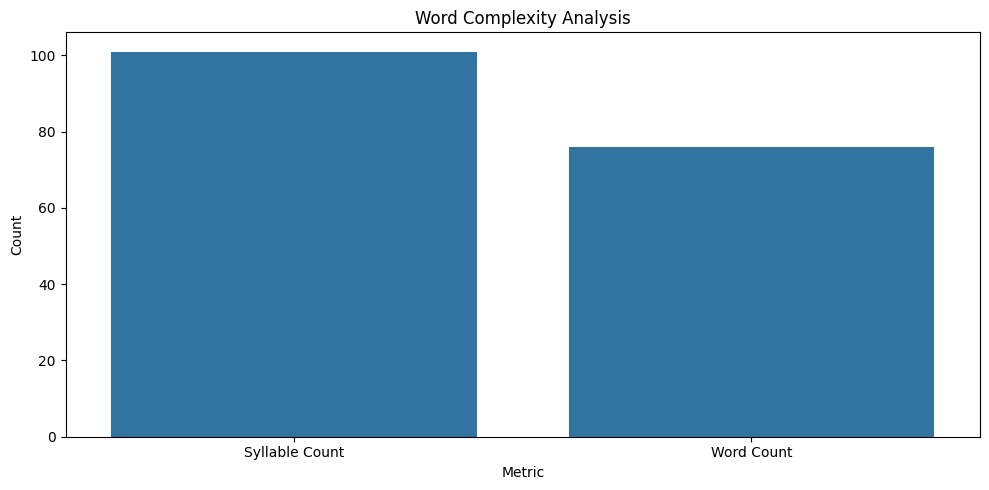

In [27]:
def analyze_word_complexity(text):
    syllable_count = textstat.syllable_count(text)
    word_count = textstat.lexicon_count(text)

    # Visualizing Word Complexity
    plt.figure(figsize=(10, 5))
    sns.barplot(x=['Syllable Count', 'Word Count'], y=[syllable_count, word_count])
    plt.title('Word Complexity Analysis')
    plt.xlabel('Metric')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Save Word Complexity Analysis to a text file
    with open('word_complexity_output.txt', 'w') as file:
        file.write(f'Syllable Count: {syllable_count}\n')
        file.write(f'Word Count: {word_count}\n')

    return {'syllable_count': syllable_count, 'word_count': word_count}

# Call the Word Complexity analysis function
word_complexity_results = analyze_word_complexity(text)


In [28]:
def save_syntax_analysis_results(analysis_results):
    with open('syntax_analysis_results.txt', 'w') as file:
        file.write(analysis_results)

def save_readability_analysis_results(analysis_results):
    with open('readability_analysis_results.txt', 'w') as file:
        file.write(analysis_results)
